In [2]:
import pandas as pd
school = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']],
index=['준서', '예은'],
columns=['나이', '성별', '학교'])
school

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리중


In [3]:
import pandas as pd
corona = pd.read_csv('owid-covid-data.csv')

corona.head()
corona.info()
corona['population']
corona.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192301 entries, 0 to 192300
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    192301 non-null  object 
 1   continent                                   181123 non-null  object 
 2   location                                    192301 non-null  object 
 3   date                                        192301 non-null  object 
 4   total_cases                                 184750 non-null  float64
 5   new_cases                                   184508 non-null  float64
 6   new_cases_smoothed                          183334 non-null  float64
 7   total_deaths                                166260 non-null  float64
 8   new_deaths                                  166241 non-null  float64
 9   new_deaths_smoothed                         165078 non-null  float64
 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
# iso_code : 국제표준국가코드
# location : 국가이름
# date : 일자
# total_class : 전체 확진자수
# population : 인구
header = ['iso_code','location','date','total_cases','population'] # 원하는 열 리스트 만들기
corona = corona[header] # 원하는 열만 있는 데이터프레임 생성
corona.info() #데이터프레임 정보
corona.head() #데이터프레임 첫행부터 5줄 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192301 entries, 0 to 192300
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iso_code     192301 non-null  object 
 1   location     192301 non-null  object 
 2   date         192301 non-null  object 
 3   total_cases  184750 non-null  float64
 4   population   191132 non-null  float64
dtypes: float64(2), object(3)
memory usage: 7.3+ MB


,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-02-24,5.0,39835428.0
1,AFG,Afghanistan,2020-02-25,5.0,39835428.0
2,AFG,Afghanistan,2020-02-26,5.0,39835428.0
3,AFG,Afghanistan,2020-02-27,5.0,39835428.0
4,AFG,Afghanistan,2020-02-28,5.0,39835428.0


In [5]:
corona = corona[(corona['iso_code'] == 'USA') | (corona['iso_code'] == 'KOR')] ## 두가지 조건걸때 괄호로 감싸주기
corona.info()
corona.duplicated() ##중복값 처리
corona = corona.set_index('date') ## date 값을 인덱스로 설정하고 원래 열에 있던 date가 옮겨감.

corona.head()




<class 'pandas.core.frame.DataFrame'>
Index: 1736 entries, 160818 to 182040
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iso_code     1736 non-null   object 
 1   location     1736 non-null   object 
 2   date         1736 non-null   object 
 3   total_cases  1736 non-null   float64
 4   population   1736 non-null   float64
dtypes: float64(2), object(3)
memory usage: 81.4+ KB


,iso_code,location,total_cases,population
date,,,,
2020-01-22,KOR,South Korea,1.0,51305184.0
2020-01-23,KOR,South Korea,1.0,51305184.0
2020-01-24,KOR,South Korea,2.0,51305184.0
2020-01-25,KOR,South Korea,2.0,51305184.0
2020-01-26,KOR,South Korea,3.0,51305184.0


In [6]:
corona['total_cases'][corona['iso_code']=='KOR'].value_counts
#corona['total_cases'][corona['iso_code']=='USA'][-1]

<bound method IndexOpsMixin.value_counts of date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-06-03    18153851.0
2022-06-04    18163686.0
2022-06-05    18168708.0
2022-06-06    18174880.0
2022-06-07    18188200.0
Name: total_cases, Length: 868, dtype: float64>

In [7]:
corona.index ## 색인정보 확인

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
       '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07'],
      dtype='object', name='date', length=1736)

In [8]:

rate = round((corona['population'][corona['iso_code']=='USA'][0] / corona['population'][0]),2)
# 한국인구 수 대비 미국인구 수 배율


In [9]:
corona['total_cases'][corona['iso_code']=='KOR'][-1]


18188200.0

<Axes: xlabel='date'>

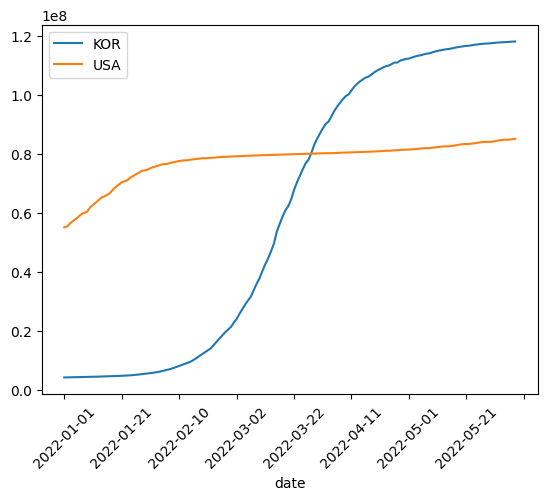

In [10]:
import matplotlib.pyplot as plt
final = pd.DataFrame(
    {'KOR' : corona['total_cases'][corona['iso_code']=='KOR'] * rate
     ,'USA' : corona['total_cases'][corona['iso_code']=='USA'] }, index = corona.index[:868]    
)
final['2022-01-01':].plot.line(rot=45)
